In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv("./play_tennis.csv")

In [3]:
print (df)

    day   outlook  temp humidity    wind play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No


In [4]:
df = df.drop("day", axis=1)

In [6]:
print (df)

     outlook  temp humidity    wind play
0      Sunny   Hot     High    Weak   No
1      Sunny   Hot     High  Strong   No
2   Overcast   Hot     High    Weak  Yes
3       Rain  Mild     High    Weak  Yes
4       Rain  Cool   Normal    Weak  Yes
5       Rain  Cool   Normal  Strong   No
6   Overcast  Cool   Normal  Strong  Yes
7      Sunny  Mild     High    Weak   No
8      Sunny  Cool   Normal    Weak  Yes
9       Rain  Mild   Normal    Weak  Yes
10     Sunny  Mild   Normal  Strong  Yes
11  Overcast  Mild     High  Strong  Yes
12  Overcast   Hot   Normal    Weak  Yes
13      Rain  Mild     High  Strong   No


In [10]:
X=np.array(pd.DataFrame(df,columns=['outlook','temp','humidity','wind']))
y = np.array(pd.DataFrame(df, columns=["play"]))

In [12]:
print(X)
print(y)

[['Sunny' 'Hot' 'High' 'Weak']
 ['Sunny' 'Hot' 'High' 'Strong']
 ['Overcast' 'Hot' 'High' 'Weak']
 ['Rain' 'Mild' 'High' 'Weak']
 ['Rain' 'Cool' 'Normal' 'Weak']
 ['Rain' 'Cool' 'Normal' 'Strong']
 ['Overcast' 'Cool' 'Normal' 'Strong']
 ['Sunny' 'Mild' 'High' 'Weak']
 ['Sunny' 'Cool' 'Normal' 'Weak']
 ['Rain' 'Mild' 'Normal' 'Weak']
 ['Sunny' 'Mild' 'Normal' 'Strong']
 ['Overcast' 'Mild' 'High' 'Strong']
 ['Overcast' 'Hot' 'Normal' 'Weak']
 ['Rain' 'Mild' 'High' 'Strong']]
[['No']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)

ValueError: could not convert string to float: 'Sunny'

In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [17]:
for feature in df.columns:
    df[feature] = LE.fit_transform(df[feature])

In [18]:
xprint(df)

    outlook  temp  humidity  wind  play
0         2     1         0     1     0
1         2     1         0     0     0
2         0     1         0     1     1
3         1     2         0     1     1
4         1     0         1     1     1
5         1     0         1     0     0
6         0     0         1     0     1
7         2     2         0     1     0
8         2     0         1     1     1
9         1     2         1     1     1
10        2     2         1     0     1
11        0     2         0     0     1
12        0     1         1     1     1
13        1     2         0     0     0


In [19]:
X=np.array(pd.DataFrame(df,columns=['outlook','temp','humidity','wind']))
y = np.array(pd.DataFrame(df, columns=["play"]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
decision_tree_model = DecisionTreeClassifier(criterion='gini')
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = decision_tree_model.predict(X_test)

In [28]:
print(y_pred)

[1 0 1]


In [29]:
print(y_test)

[[1]
 [0]
 [1]]


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_pred, y_test))    //2분의3개 맞앗으니까 0.66
print(confusion_matrix(y_test,y_pred))   
//true positive,negative 정확한예측, false poisitive,negative 예측과틀림
가로는 예측값 세로는 실제값

1.0
[[1 0]
 [0 2]]


[Text(186.0, 190.26, 'X[0] <= 1.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(111.60000000000001, 135.9, 'X[3] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(74.4, 81.53999999999999, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(37.2, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(148.8, 81.53999999999999, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(260.40000000000003, 135.9, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(297.6, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

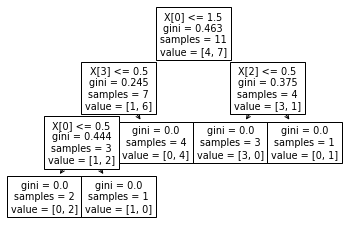

In [33]:
from sklearn import tree
tree.plot_tree(decision_tree_model)

[Text(279.0, 428.08500000000004, 'X[0] <= 1.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(167.4, 305.775, 'X[3] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(111.60000000000001, 183.46500000000003, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(55.800000000000004, 61.15499999999997, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(167.4, 61.15499999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 183.46500000000003, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(390.6, 305.775, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(334.8, 183.46500000000003, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(446.40000000000003, 183.46500000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

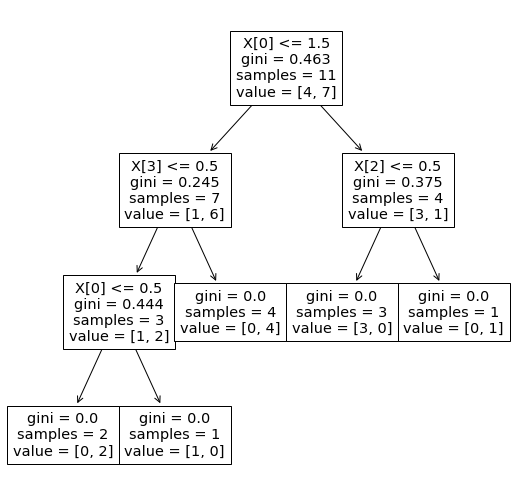

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
tree.plot_tree(decision_tree_model)

In [38]:
print(df.columns)

Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')


[Text(279.0, 428.08500000000004, 'p <= 1.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Yes'),
 Text(167.4, 305.775, 'y <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = Yes'),
 Text(111.60000000000001, 183.46500000000003, 'p <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(55.800000000000004, 61.15499999999997, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(167.4, 61.15499999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(223.20000000000002, 183.46500000000003, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(390.6, 305.775, 'a <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(334.8, 183.46500000000003, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(446.40000000000003, 183.46500000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes')]

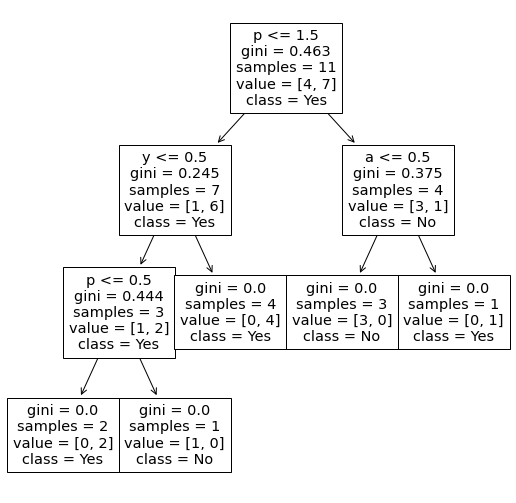

In [42]:
features = df.columns
class_name = {0: "No", 1: "Yes"}
plt.figure(figsize=(9,9))
tree.plot_tree(decision_tree_model, feature_names=feature, class_names=class_name)

In [46]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
train_df = pd.concat([X_train_df,y_train_df],axis=1)
train_df.columns = df.columns

In [47]:
print(train_df)

    outlook  temp  humidity  wind  play
0         1     2         0     1     1
1         1     2         1     1     1
2         1     2         0     0     0
3         0     1         0     1     1
4         2     1         0     1     0
5         2     1         0     0     0
6         2     2         0     1     0
7         1     0         1     1     1
8         2     0         1     1     1
9         0     0         1     0     1
10        0     2         0     0     1


In [51]:
h0p0=train_df[(train_df['humidity']==0) &(train_df["play"]==0)]
h0p1=train_df[(train_df['humidity']==0) &(train_df["play"]==1)]
h1p0=train_df[(train_df['humidity']==1) &(train_df["play"]==0)]
h1p1=train_df[(train_df['humidity']==1) &(train_df["play"]==1)]


In [57]:
gini_humidity_0 = 1-(len(h0p0)/(len(h0p0)+len(h0p1)))**2-(len(h0p1)/(len(h0p0)+len(h0p1)))**2
print(gini_humidity_0)

0.48979591836734704


In [67]:
gini_humidity_1 = 1-(len(h1p0)/(len(h1p0)+len(h1p1)))**2-(len(h1p1)/(len(h1p0)+len(h1p1)))**2
print(gini_humidity_1)

0.0


In [72]:
gain = ((len(h0p0)+len(h0p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1)) * gini_humidity_0) + ((len(h0p0)+len(h0p1))/(len(h0p0)+len(h0p1)+len(h1p0)+len(h1p1))*gini_humidity_1)
print(gain)                                                  

0.31168831168831174
